In [1]:
import matplotlib.pyplot as plt
import dask.dataframe as dd
import pandas as pd

In [2]:
#from dask.distributed import Client
#client = Client()

In [3]:
out_dir = "../results"

In [28]:
path_f = f"{out_dir}/res_firm_agent_runbeta4_opttype2.csv.gz"

In [29]:
firm_dk = dd.read_csv(path_f, blocksize=1000000 , dtype={
    "t": "int16",
    "id": "int32",
    "age": "int16",
    "number_employees": "int32",
    "total_effort": "float64",
    "output": "float64",
    "average_pref": "float64"}
)

C:\Users\41782\anaconda3\envs\abm-env\lib\site-packages\dask\dataframe\io\csv.py:529: UserWarning: Warning gzip compression does not support breaking apart files
Please ensure that each individual file can fit in memory and
use the keyword ``blocksize=None to remove this message``
Setting ``blocksize=None``
  warn(


In [9]:
firm_dk.memory_usage(deep=True).compute()

Index                   128
age                 1962848
average_pref        7851392
id                  3925696
number_employees    3925696
output              7851392
t                   1962848
total_effort        7851392
dtype: int64

In [31]:
firm_number = firm_dk.groupby(firm_dk.t).t.size()

In [32]:
firm_number_df = firm_number.compute()

In [33]:
firm_number_df

t
0       3865
1       3734
2       3595
3       3477
4       3367
        ... 
1495     768
1496     764
1497     753
1498     748
1499     752
Name: t, Length: 1500, dtype: int64

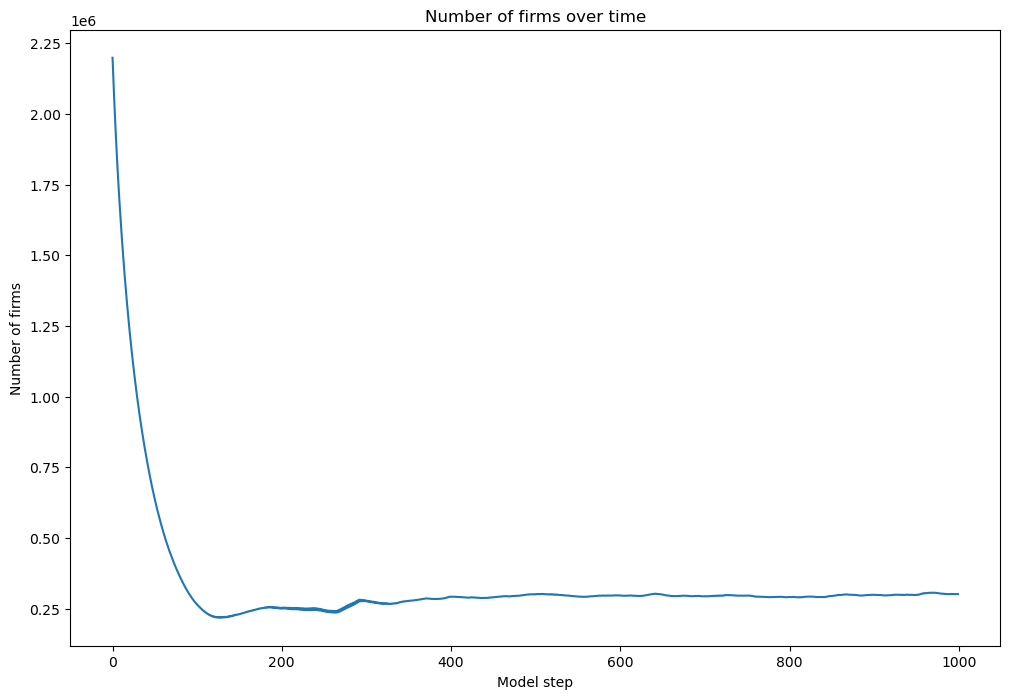

In [18]:

plt.figure(figsize=(12, 8))
firm_number_df.plot()
plt.xlabel("Model step")
plt.ylabel("Number of firms")
plt.title("Number of firms over time")
plt.savefig(f"{out_dir}/fullrun_numbfirms.png")
plt.show()

In [34]:
path_w = f"{out_dir}/res_worker_agent_runbeta4_opttype2.csv.gz"

In [39]:
worker_dk = dd.read_csv(path_w)

C:\Users\41782\anaconda3\envs\abm-env\lib\site-packages\dask\dataframe\io\csv.py:529: UserWarning: Warning gzip compression does not support breaking apart files
Please ensure that each individual file can fit in memory and
use the keyword ``blocksize=None to remove this message``
Setting ``blocksize=None``
  warn(


In [41]:
worker_dk

,t,id,effort,wealth,income,job_event,tenure,preference
npartitions=1,,,,,,,,
,int64,int64,float64,float64,float64,object,int64,float64
,...,...,...,...,...,...,...,...


In [54]:
worker = worker_dk.groupby("id").mean()

In [55]:
worker.compute()

,t,effort,wealth,income,tenure,preference
id,,,,,,
1,749.5,0.025600,42.275745,0.056737,20.934667,0.315
3,749.5,0.200067,138.919168,0.217824,30.604667,0.972
5,749.5,0.033800,41.161207,0.056286,29.919333,0.270
7,749.5,0.024333,29.289087,0.038384,25.070667,0.037
9,749.5,0.020000,43.330857,0.053521,23.972000,0.196
...,...,...,...,...,...,...
7991,749.5,0.041867,31.839027,0.045352,22.065333,0.810
7993,749.5,0.028667,44.164102,0.057293,27.125333,0.320
7995,749.5,0.030200,35.830618,0.050925,28.329333,0.585


In [76]:
drop = worker_dk[worker_dk.t >= -1]

In [77]:
tenure = drop.compute()

In [78]:
tenure = worker_dk.groupby("tenure").value_counts(normalize=True)

AttributeError: 'Column not found: value_counts'

In [79]:
tenure

,t,id,effort,wealth,income,job_event,tenure,preference
0,0,1,0.1,0.039,0.039,not_active,1,0.315
1,0,3,0.1,0.028,0.028,not_active,1,0.972
2,0,5,0.1,0.051,0.051,not_active,1,0.270
3,0,7,0.1,0.024,0.024,not_active,1,0.037
4,0,9,0.1,0.048,0.048,not_active,1,0.196
...,...,...,...,...,...,...,...,...
5999995,1499,7991,0.1,68.016,0.079,not_active,12,0.810
5999996,1499,7993,0.0,85.884,0.001,not_active,18,0.320
5999997,1499,7995,0.0,76.367,0.030,not_active,24,0.585
5999998,1499,7997,0.9,748.175,1.142,not_active,16,0.991


In [80]:
tenure_dist = tenure.tenure.value_counts(normalize=True)

In [81]:
tenure_dist

0       3.968550e-02
1       3.876617e-02
2       3.720750e-02
3       3.569617e-02
4       3.425517e-02
            ...     
1343    1.666667e-07
1344    1.666667e-07
1345    1.666667e-07
1346    1.666667e-07
1460    1.666667e-07
Name: tenure, Length: 1461, dtype: float64

In [82]:
multi = 1/tenure_dist[0]

In [83]:
tenure_norm = tenure_dist*multi

In [84]:
tenure_norm[0:200]

0      1.000000
1      0.976835
2      0.937559
3      0.899476
4      0.863166
         ...   
195    0.000382
196    0.000365
197    0.000353
198    0.000349
199    0.000340
Name: tenure, Length: 200, dtype: float64

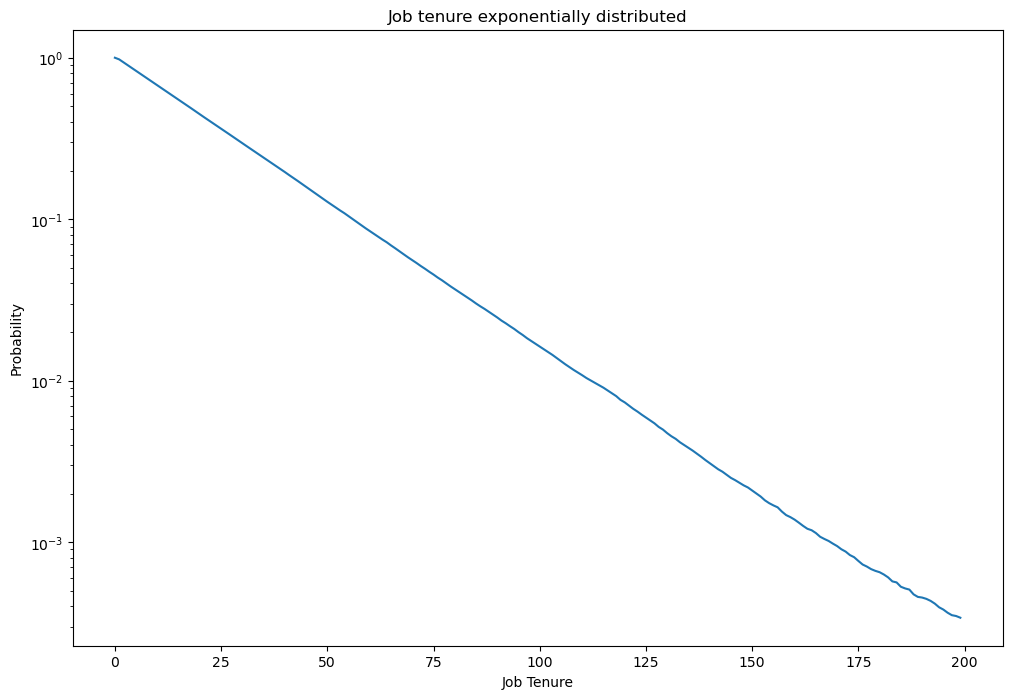

In [85]:
plt.figure(figsize=(12, 8))
tenure_norm[0:200].plot()
plt.yscale("log")
plt.xlabel("Job Tenure")
plt.ylabel("Probability")
plt.title("Job tenure exponentially distributed")
plt.show()